# 1. Crop and flip an image using Numpy array indexing.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(667, 1000, 3)


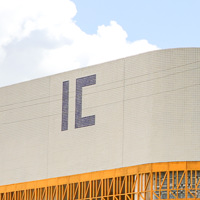

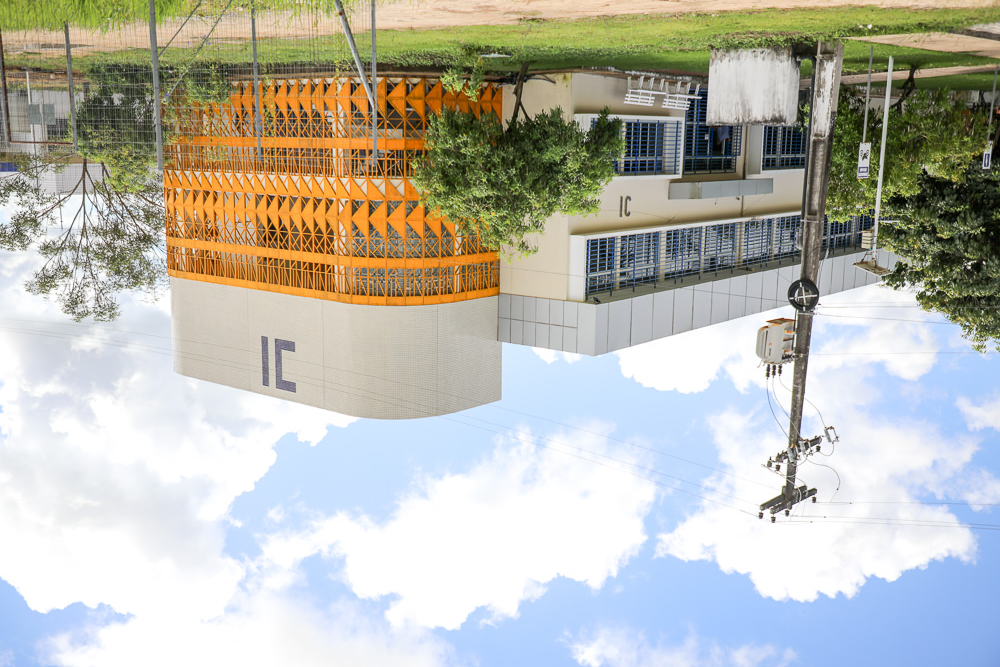

In [8]:
from google.colab import drive
from google.colab.patches import cv2_imshow
from PIL import Image
import numpy as np
import cv2

drive.mount('/content/drive')
image = np.array(Image.open('/content/drive/MyDrive/ic-ufal.jpg'))
print(image.shape)

image_crop = image[200:400, 200:400]
Image.fromarray(image_crop).save('/content/drive/MyDrive/ic-ufal_crop.jpg')
Image.fromarray(np.flipud(image)).save('/content/drive/MyDrive/ic-ufal_flipud.jpg')

image_crop = cv2.cvtColor(image_crop, cv2.COLOR_BGR2RGB)
image_flip = cv2.cvtColor(np.flipud(image), cv2.COLOR_BGR2RGB)
cv2_imshow(image_crop)
cv2_imshow(image_flip)





# 2. Implement image translation using Numpy and OpenCV.

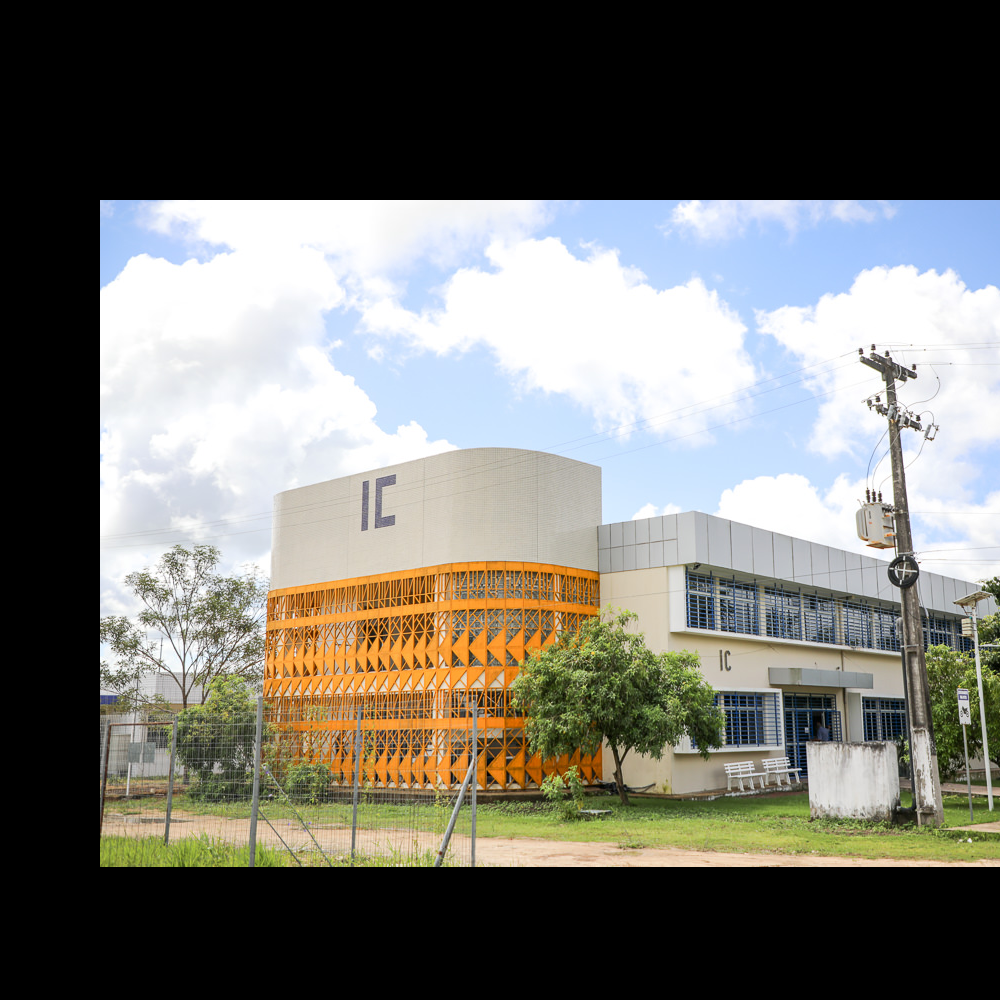

In [9]:
image_cv = cv2.imread('/content/drive/MyDrive/ic-ufal.jpg')

width = image_cv.shape[1]
height = image_cv.shape[1]

matrix = np.float32([[1, 0, 100], [0, 1, 200]])
image_translation = cv2.warpAffine(image_cv, matrix, (width, height))

cv2.imwrite('/content/drive/MyDrive/ic-ufal_cv_translation.jpg', image_translation)
cv2_imshow(image_translation)

# 3. Implement image rotation using Numpy and OpenCV.

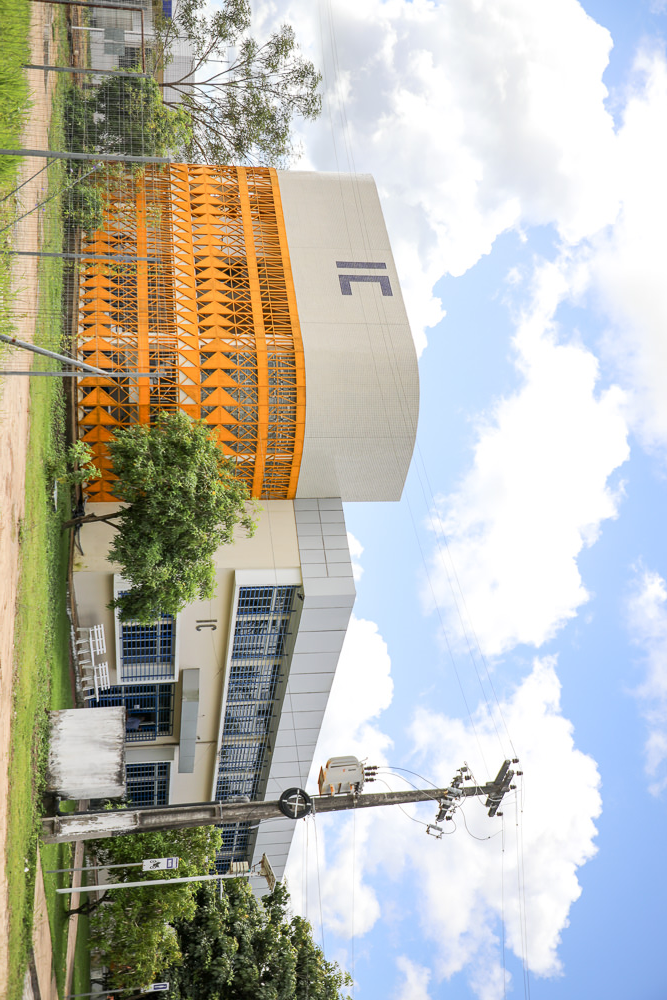

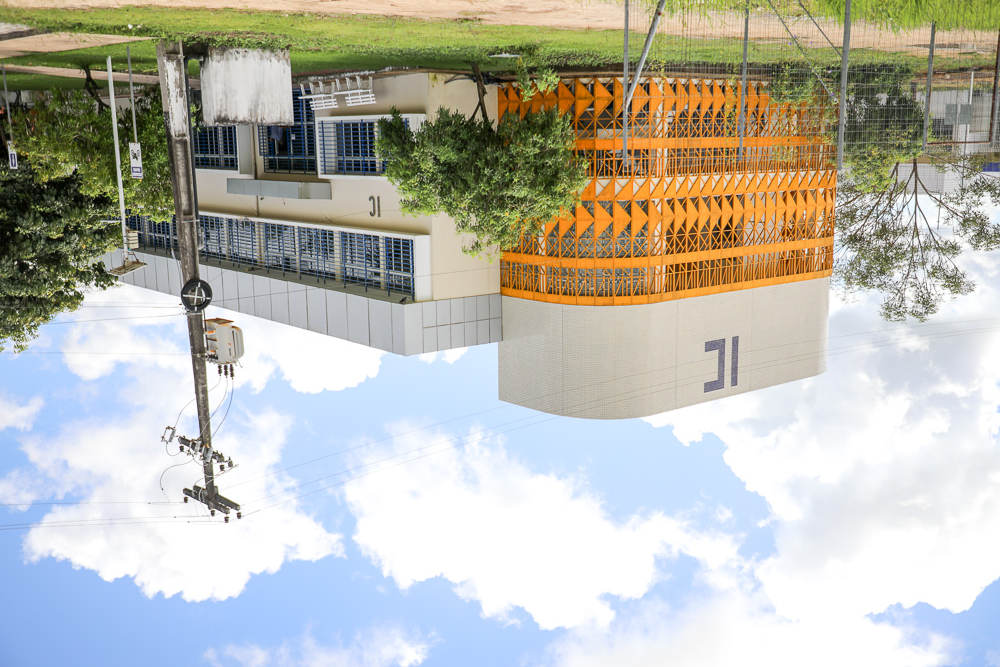

In [10]:
image_cv_rotate = cv2.rotate(image_cv, cv2.ROTATE_90_CLOCKWISE)
cv2.imwrite('/content/drive/MyDrive/ic-ufal_cv_rotate.jpg', image_cv_rotate)

cv2_imshow(image_cv_rotate)

Image.fromarray(np.rot90(image, 2)).save('/content/drive/MyDrive/ic-ufal_numpy_rotate.jpg')
image_180 = cv2.cvtColor(np.rot90(image, 2), cv2.COLOR_BGR2RGB)
cv2_imshow(image_180)

# 4. Implement image resizing using OpenCV.

(300, 300, 3)


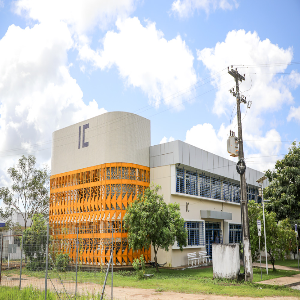

In [13]:
resize_width = int(width * 0.3)
resize_height = int(height * 0.3)

dsize = (resize_width, resize_height)
image_resized = cv2.resize(image_cv, dsize)
print(image_resized.shape)

cv2.imwrite('/content/drive/MyDrive/ic-ufal_cv_resized.jpg', image_resized)
cv2_imshow(image_resized)

# 5. Implement bitwise operations: AND, OR, XOR.

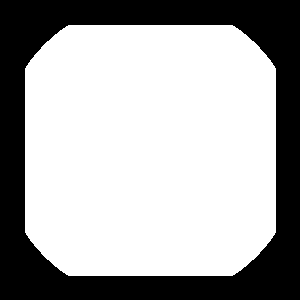

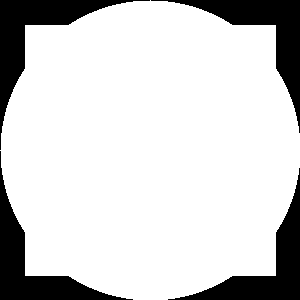

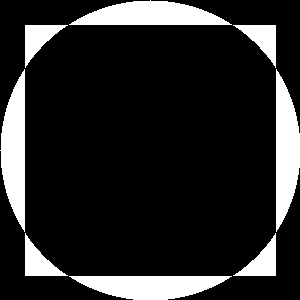

In [14]:
# draw a rectangle
rectangle = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)

# draw a circle
circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)

bitw_and = cv2.bitwise_and(rectangle, circle)
bitw_or = cv2.bitwise_or(rectangle, circle)
bitw_xor = cv2.bitwise_xor(rectangle, circle)

cv2.imwrite('/content/drive/MyDrive/and.jpg', bitw_and)
cv2.imwrite('/content/drive/MyDrive/or.jpg', bitw_or)
cv2.imwrite('/content/drive/MyDrive/xor.jpg', bitw_xor)

cv2_imshow(bitw_and)
cv2_imshow(bitw_or)
cv2_imshow(bitw_xor)

# 6. Implement the "mask" operation, where a third image 'h' contains only a Region of Interest (ROI -- defined by the second image mask 'g') obtained from the input image 'f'. Note that this Region can be of any shape.

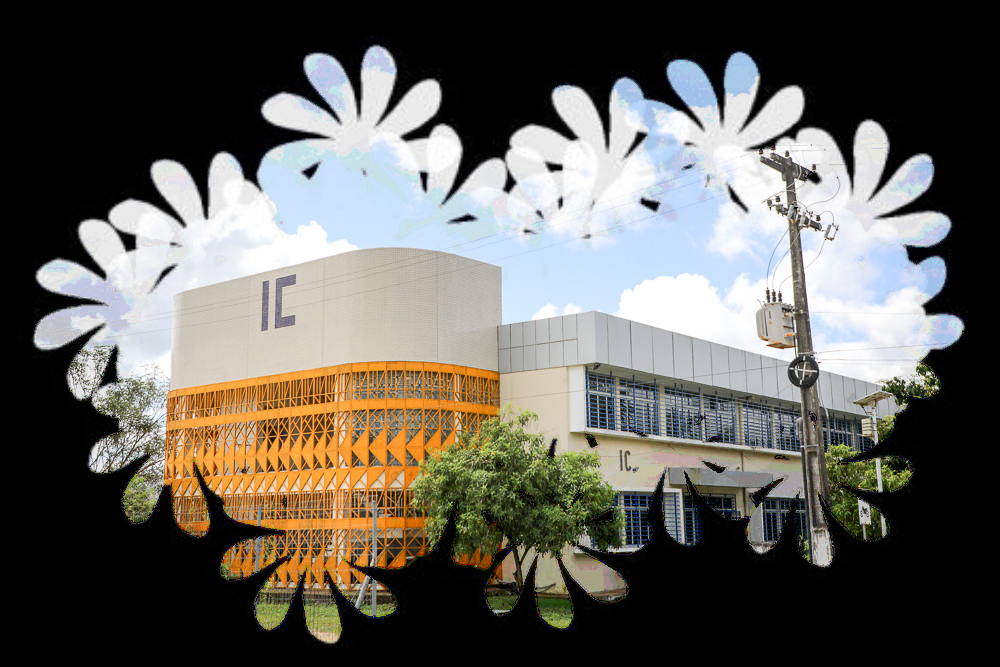

In [17]:
img_f = cv2.imread('/content/drive/MyDrive/ic-ufal.jpg')
img_g = cv2.imread('/content/drive/MyDrive/molde.jpg')


img_g = cv2.resize(img_g, img_f.shape[1::-1])

img_h = cv2.bitwise_and(img_f, img_g)
cv2.imwrite('/content/drive/MyDrive/ic-ufal_mask.jpg', img_h)
cv2_imshow(img_h)